<a href="https://colab.research.google.com/github/Edu963/python_projects/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline
from matplotlib import rcParams

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources:

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

### Subject comprehension

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

**Answer here**
1. *Clustering* is like organizing legos by color

2. *What are the main steps in the standard process of clustering?*
- Choose the number of clusters (K): Decide how many groups you want to divide your data into.
- Initialize centroids: Select initial central points for each cluster. These can be chosen randomly.
- Assign points to clusters: For each data point, find the nearest centroid and assign the point to that cluster.
- Update centroids: Calculate the new centroids by finding the average position of all points in each cluster.
- Repeat: Reassign points to clusters based on the new centroids and update the centroids again. Keep repeating until the centroids don't change much.

3. *What is the Silhouette coefficient?*

The Silhouette coefficient is a way to measure how well your data points are clustered. It looks at how close each point is to the points in its own cluster compared to the points in other clusters. itacts like a score that tells you how well each item fits into its group. The score ranges from -1 to 1, where 1 means the point is well clustered, 0 means it's on or very close to the border between clusters, and negative values mean the point might be in the wrong cluster.

4. *What are the two types of evaluation for a clustering algorithm and what is the difference between them?*

- Internal Evaluation: This method looks at how well the clusters are formed using only the data you have. It measures things like compactness (how close the points in a cluster are to each other) and separation (how far apart the clusters are from each other). The Silhouette coefficient is an example of an internal evaluation metric.

- External Evaluation: This method compares the clusters formed by your algorithm to a pre-defined structure or labels you already have. For example, if you know in advance which fruits should be grouped together, you can see how well your clustering matches this known grouping. It's like having a teacher grade your grouping against an answer key

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [6]:
df = pd.read_csv('bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [7]:
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df = df[numeric_columns]

df.dropna(inplace=True)
df.head()

<ipython-input-7-908328d56f3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


In [ ]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


Plot histograms of features

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

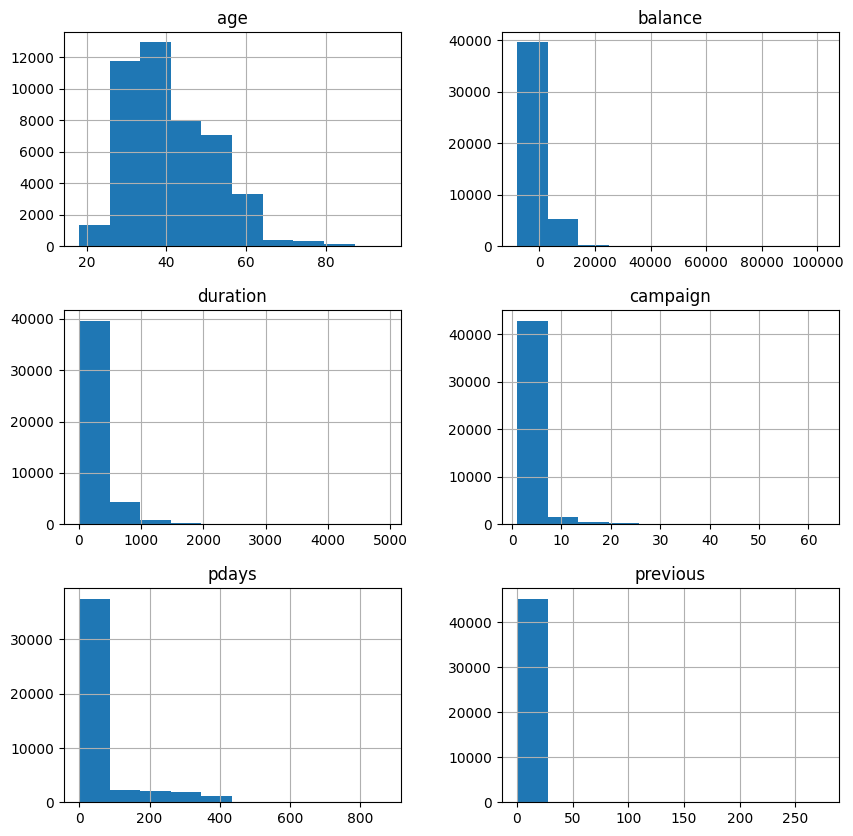

In [ ]:
df.hist(figsize=(10,10))

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers.


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


***ANSWER***
1. A centroid is the central point of a cluster.Kind off like  the "average" position of all the points in a group.
2. To compute a centroid, you take the average of all the data points in the cluster. For each dimension (or feature) of the data, you calculate the mean value. For example, if your data points have two dimensions (like coordinates on a map), the centroid's coordinates would be the average of all the x-coordinates and the average of all the y-coordinates of the points in the cluster.
3.Yes, we need to specify the number of clusters in advance when using the KMeans algorithm.

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
import numpy as np

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

1. Normalize the Data: Since KMeans is sensitive to the scale of the data, we'll first normalize the data.
2. Apply KMeans Clustering: We'll cluster the data into 5 clusters.
3. Calculate Silhouette Score: To evaluate the quality of the clustering

In [9]:
# Normalize the data
numeriq_pipline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
df_norm = numeriq_pipline.fit_transform(df)
df_norm = pd.DataFrame(df_norm, index=df.index,columns=df.columns)
print(df_norm)


            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016 -0.569351 -0.411453 -0.251940
1      0.288529 -0.437895 -0.416127 -0.569351 -0.411453 -0.251940
2     -0.747384 -0.446762 -0.707361 -0.569351 -0.411453 -0.251940
3      0.571051  0.047205 -0.645231 -0.569351 -0.411453 -0.251940
4     -0.747384 -0.447091 -0.233620 -0.569351 -0.411453 -0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747 -0.176460  2.791329  0.076230 -0.411453 -0.251940
45207  2.831227  0.120447  0.768224 -0.246560 -0.411453 -0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791 -0.228024  0.970146  0.399020 -0.411453 -0.251940
45210 -0.370689  0.528364  0.399328 -0.246560  1.476138  4.523577

[45211 rows x 6 columns]


In [ ]:
df_norm.describe()


,age,balance,duration,campaign,pdays,previous,cluster
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.112250e-16,1.760208e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17,1.810500e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,-1.941696e+00
25%,-7.473845e-01,-4.237719e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,-4.821715e-01
50%,-1.823406e-01,-3.002800e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,-4.821715e-01
75%,6.652252e-01,2.158743e-02,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,9.773529e-01
max,5.091402e+00,3.309478e+01,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,9.773529e-01


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>],
       [<Axes: title={'center': 'cluster'}>, <Axes: >, <Axes: >]],
      dtype=object)

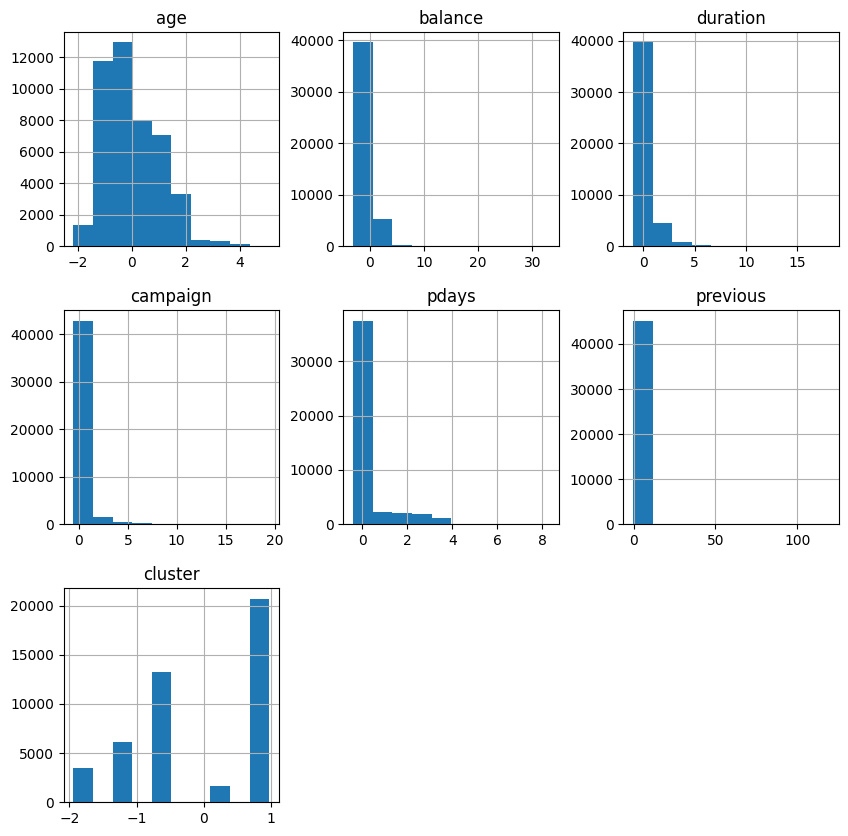

In [ ]:
df_norm.hist(figsize=(10,10))


In [10]:
df_norm = df_norm.sample(frac=0.1).reset_index(drop=True)
df_norm.head()

,age,balance,duration,campaign,pdays,previous
0,0.382703,-0.437238,0.523588,-0.246560,2.694582,0.182198
1,1.512791,1.447000,0.985679,-0.569351,-0.411453,-0.251940
2,0.476877,-0.056580,0.224588,-0.246560,-0.411453,-0.251940
3,-0.841558,-0.404394,-0.567569,-0.569351,0.407502,0.182198
4,0.100181,0.202227,-0.738426,0.399020,-0.411453,-0.251940


In [11]:
nb_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=nb_clusters,random_state=42)
clusters = kmeans.fit_predict(df_norm)

# Add the cluster assignments to the original dataframe
df['cluster'] = clusters

# Calculate the silhouette score
sil_score = silhouette_score(df_norm, clusters)

df.head(), sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Length of values (4521) does not match length of index (45211)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>],
       [<Axes: title={'center': 'cluster'}>, <Axes: >, <Axes: >]],
      dtype=object)

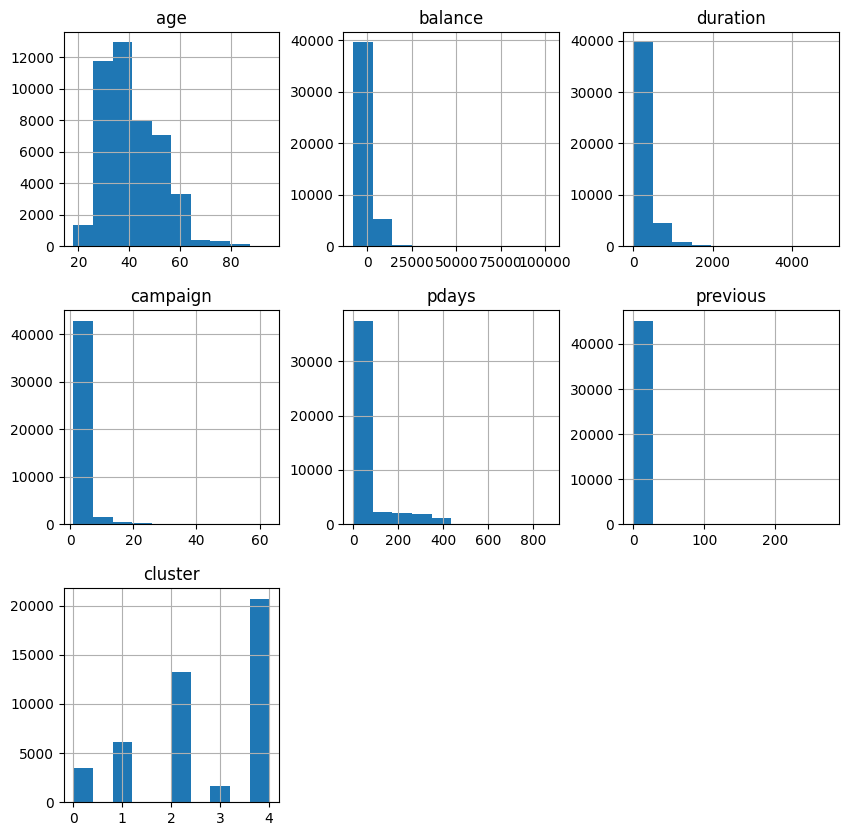

In [ ]:
df.hist(figsize=(10,10))

Print the centroids obtained

In [12]:
kmeans.cluster_centers_

array([[ 1.50151181e-01,  5.68419470e+00, -9.37884829e-02,
         6.96423855e-02, -1.84852975e-02, -8.29154890e-03],
       [-6.41130488e-01, -1.57917557e-01,  2.52766057e-02,
        -1.59308112e-01, -3.72403969e-01, -2.22458303e-01],
       [-1.09380869e-01, -1.99284946e-02,  1.75647973e-02,
        -2.01851190e-01,  2.23469754e+00,  1.33593387e+00],
       [ 1.08179656e+00, -1.34022175e-03, -8.66624116e-02,
        -1.24423481e-01, -3.29358192e-01, -1.89361935e-01],
       [-1.11580060e-01, -1.32427333e-01, -3.92463532e-01,
         3.81952728e+00, -4.11453106e-01, -2.51940371e-01]])

Print the cluster labels assigned to each point

In [13]:
kmeans.labels_

array([2, 3, 3, ..., 1, 3, 3], dtype=int32)

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [14]:
from sklearn.decomposition import PCA
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca =pd.DataFrame (data = pca.fit_transform(df_norm) , columns = ['PC1', 'PC2'])
df_pca.head()



,PC1,PC2
0,2.153382,-0.826021
1,0.095423,1.828671
2,-0.407388,0.149706
3,0.348134,-0.832022
4,-0.586188,0.338798


In [15]:
df_pca['cluster'] = kmeans.labels_

In [16]:
print(df_pca)

           PC1       PC2  cluster
0     2.153382 -0.826021        2
1     0.095423  1.828671        3
2    -0.407388  0.149706        3
3     0.348134 -0.832022        1
4    -0.586188  0.338798        1
...        ...       ...      ...
4516  0.794950  0.601187        1
4517 -0.632594  0.061944        1
4518 -0.437943  0.100733        1
4519 -0.315660  0.507639        3
4520 -0.810286  0.296006        3

[4521 rows x 3 columns]


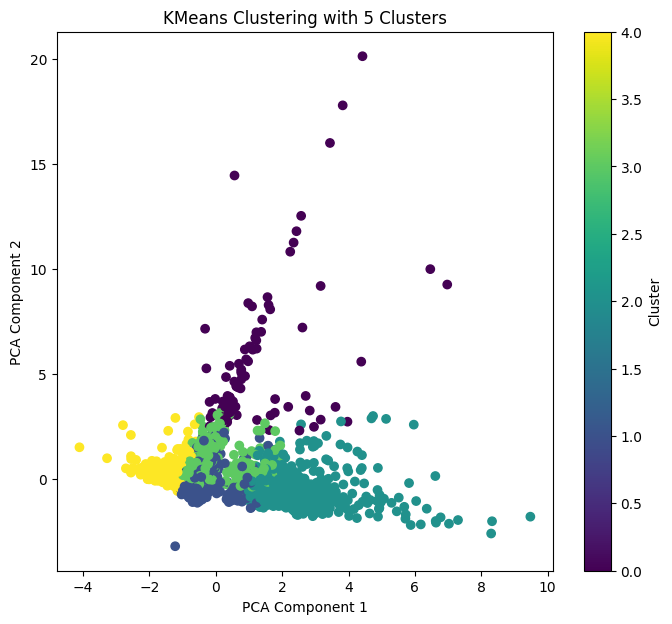

In [18]:
# Plotting the scatter plot
plt.figure(figsize=(8, 7))
#ax=fig.add_subplot(111)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering with 5 Clusters')
plt.colorbar(label='Cluster')
plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means

Print the inertia obtained after the clustering.

In [19]:
inertia = kmeans.inertia_
inertia

14120.714219574555

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [20]:
# Calculate the silhouette score
sil_score = silhouette_score(df_norm, clusters)

sil_score

0.277638221472209

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is 0.4035563141882848


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is 0.41691558091540165


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is 0.25834165677793525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is 0.277638221472209


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is 0.3008465117518495


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is 0.31218028421091143


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is 0.3206708150468176


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is 0.32327653520912225


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is 0.31473634440491766


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, the average silhouette_score is 0.3005729608147903


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, the average silhouette_score is 0.24616408729663095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, the average silhouette_score is 0.24743575060404827


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, the average silhouette_score is 0.2431595688776526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15, the average silhouette_score is 0.2436776917552514


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16, the average silhouette_score is 0.2461786890229904


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17, the average silhouette_score is 0.24737346293866924


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18, the average silhouette_score is 0.23214879628995666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19, the average silhouette_score is 0.23080693016089407


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20, the average silhouette_score is 0.22359368160419593


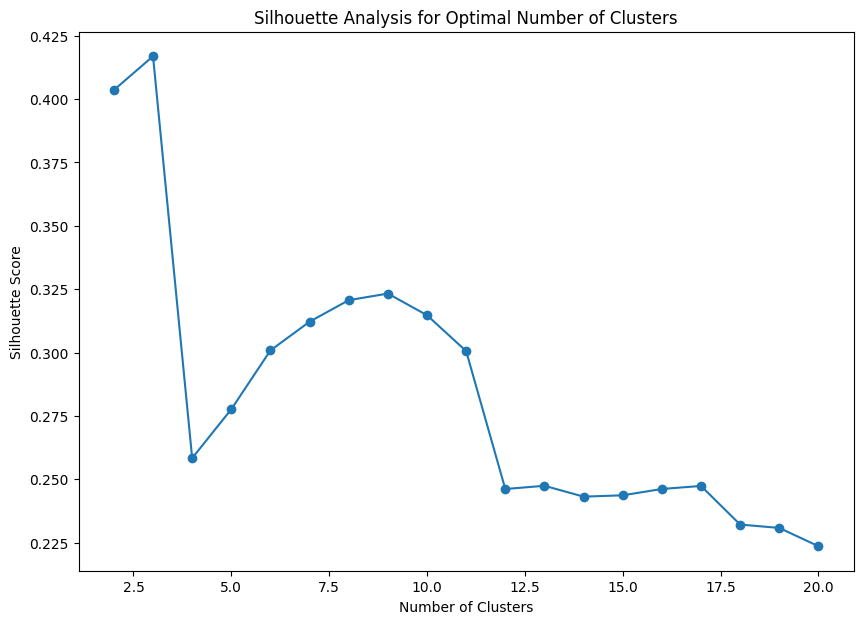

In [21]:
# Range for the number of clusters
range_n_clusters = list(range(2, 21))

# List to store silhouette scores
silhouette_scores = []

# Compute silhouette scores for different numbers of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_norm)
    silhouette_avg = silhouette_score(df_norm, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal Number of Clusters")
plt.show()

What is the optimal number of clusters that you obtained?

**Answer here** Not sure.. I think around 3.5

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering.

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

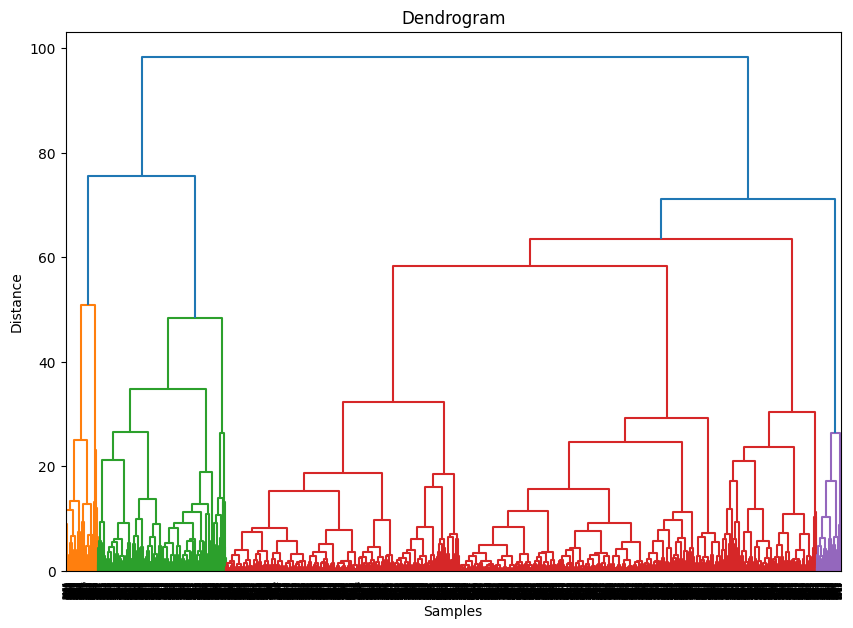

In [23]:
# Create and plot the dendrogram
linked = linkage(df_norm, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
# code here

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes.

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here